In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

# Phasor

#### sin 곡선을 만드는 장치(소프트웨어): Phasor (sinusoid wave를 만드는 것)

#### 40000/2 : 가청주파수(사람의 가청주파수(20000Hz)에서 40000이라는 값이 나온 것)
#### dur: 0.5초

#### sampling rate: ★1초에 몇 개의 정보를 담을까(점의 갯수)(1/10000, 2/10000, ... ,10000/10000) cf. 4만k: 사람이 구분 불가(1초에 40000개의 소리가 있으면 실제와 녹음 더 이상 구분 불가)

#### Hz: '1초에 몇 번'이라는 말이 있으면 이 단위 사용. 다른 것도 이 단위로 측정 가능.
#### ex) sin wave(태극무늬)가 1초에 몇 번 있는가? sr. 둘은 다른 개념 그래도 같은 단위 사용
#### freq: 몇번 태극 문양이 반복되는가? - 이 횟수! -> 소리의 음과 관련 있다(고주파high freq 저주파low freq) (주파수와 음높이)

#### <1개의 sin 곡선을 정의하기 위해 정의해야 하는 것들>

In [19]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 1          # in seconds
freq = 1000     # frequency, Hz

#### array가 1부터 4999까지, 근데 5000까지 하라고 +1 입력
#### ~0.5까지가 만들어진다(1/10000~5000/10000)
#### 시간을 0.5초까지 만듦(1/10000초~5000/10000초): 초를 잘게 쪼갬
#### 그렇다면 1초 안에 들어 있는 정보의 수는? 답:10000개(sr)
#### 초마다 정보를 넣는다

#### 모든 sound는 sin 곡선의 합이다(다양한 freq의 sin 곡선들을 합한다)
#### sin의 요소(2가지)
#### 1초에 몇 번 왔다갔다(100번 -> 100Hz)
#### 진폭(amplitude) -> 음의 크기
#### 이 두 요소는 독립적이다

#### 가장 먼저 하는 일: 시간 만들기
#### numpy 안에 있는 함수인 arange를 사용
#### np.arange(1,sr): 1~9999를 담은 sequence를 만들어낸다 -> 1초부터 9999초까지 만듦
#### np.arange(1,sr+1)/sr: 1~10000까지의 숫자를가 1/10000~10000/10000까지 간다(1초 안에 10000개 시간 틱이 들어있다)
#### np.arange(1,sr*0.5+1)/sr: 5000(1/10000~5000/10000)까지 들어가는 셈(0.5초까지 하는 셈)
#### type(t)

In [22]:
# generate time
t = np.arange(1, sr * dur+1)/sr
print(len(t))
t1 = np.arange(1, sr * dur)/sr
print(len(t1))

10000
9999


In [23]:
#### freq를 사용하면 시간이 각도로 변환이 가능해진다
#### 태극문양 1개 = 1개의 cycle
#### prac1: 0부터 2pi까지 가는데 이게 10000개로 쪼개짐
#### prac2: 끝나는 지점은 4pi가 된다 (4pi까자 가면서 2바퀴를 돌게 된다)
#### pi 값이 numpy에 정의되어 있다

In [24]:
# generate phase
prac1 = t * 2*np.pi
prac2 = t * 2*np.pi*2
theta = t * 2*np.pi * freq   

In [25]:
len(t) == len(theta)

True

#### np.sin을 사용: 이 함수는 numpy 안에 sin 함수가 있다(numpy를 불러와서 np라고 부르겠다고 앞에서 정함)
#### sin 함수의 input: 각도값(시간 아님)(숫자)(radian의 형태로 값을 넣어야 한다)
#### 물리적인 세계에서 시간개념이 없으면 아무것도 있을 수 없다
#### x축에 시간개념을 부여해야! (시간을 가장 먼저 만들어야 실체를 만들 수 있다)

#### s에 sin에 해당하는 값들이 들어와 있다

In [28]:
# generate signal by cosine-phasor
s = np.sin(theta)

In [29]:
len(t) == len(theta) == len(s)

True

#### ax.plot(t, s): plot을 하는 데 있어서는 theta가 사용되지 않는다
#### 여기 점의 갯수 = len(t) = len(theta) =len(s)
#### 100번째에 해당되는 값의 시간값과 theta 값을 알 수 있다
#### 각도 (theta) 값 구해보자: 0.01초, 20pi, 10번째 cycle의 마지막 값 
#### ax.plot(t[0:1000], s[0:1000]): 10000개의 값 중에서 앞의 1000개의 값만 보여줘
#### '.': 점으로 표시됨(o를 써넣을 수도 있다)

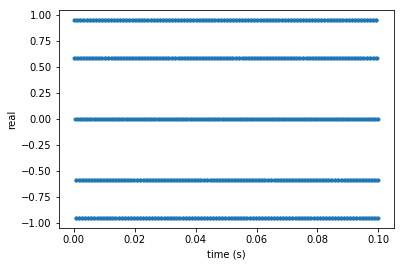

In [31]:
fig = plt.figure()  ## 시험 x
ax = fig.add_subplot(111)   ## 시험 x
ax.plot(t[0:1000], s[0:1000], '.') ## 시험 o
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ipd.Audio(s, rate=sr)

#### np.sin 대신에 np.exp & 1j 입력

In [38]:
# generate signal by complex-phasor
c = np.exp(theta*1j)

Text(0.5, 0, 'imag')

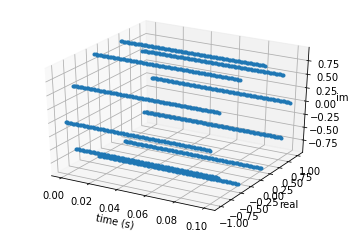

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [35]:
ipd.Audio(s, rate=sr)

# Generate pulse train

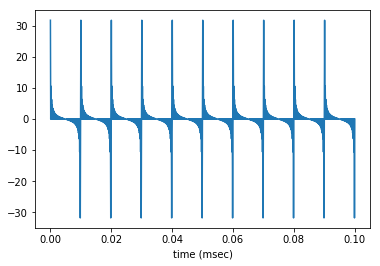

In [36]:
# generate samples, note conversion to float32 array
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));
for freq in range(F0, Fend+1, F0):
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)

##### 여기까지만 시험범위

In [79]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

In [126]:
RG = 0  # RG is the frequency of the Glottal Resonator
BWG = 100  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [127]:
RG = 500  # RG is the frequency of the Glottal Resonator
BWG = 60  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [128]:
RG = 1500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [129]:
RG = 2500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [130]:
RG = 3500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [131]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)

# load wav

In [132]:
from scipy.io import wavfile
# sr, s = wavfile.read('a.wav')
nSamp = len(s)
dur = nSamp / sr
t = np.linspace(1/sr, dur, nSamp)

# Fourier tranform

In [133]:
nFFT = nSamp
amp = [];
for n in range(0,nFFT):
    omega = 2*np.pi*n/nFFT # angular velocity
    z = np.exp(omega*1j)**(np.arange(0,nSamp))
    amp.append(np.abs(np.dot(s,z)))

<IPython.core.display.Javascript object>


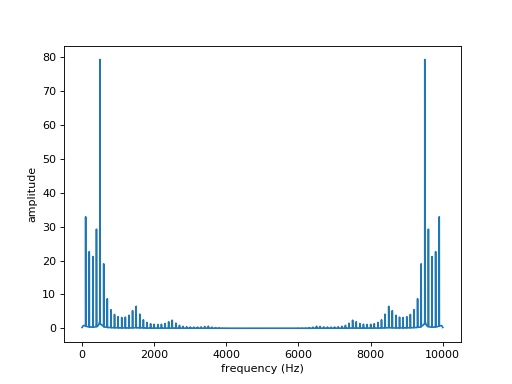

Text(0, 0.5, 'amplitude')

In [134]:
fig = plt.figure()
ax = fig.add_subplot(111)
freq = np.arange(1,nFFT+1)*sr/nFFT;
ax.plot(freq, amp)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')

# define helper functions

In [100]:
def frame_signal(signal, srate, win_size, win_step):
    frame_size = int(win_size * srate)
    frame_step = int(win_step * srate)

    # Get number of frames
    num_frames = int(np.ceil(np.abs(len(signal) - frame_size) / frame_step))
    # Pad signal
    pad_len = num_frames * frame_step + frame_size
    pad = np.zeros((pad_len - len(signal)))
    signal_padded = np.append(signal, pad)
    # Get within-frame sample indices
    idx1 = np.tile(np.arange(0, frame_size), (num_frames, 1))
    # Get vectors of frame_step increments
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_size, 1)).T
    # Get total indices divided by each frame
    indices = idx1 + idx2
    # Get frames divided by each frame based on indices
    frames = signal_padded[indices.astype(np.int32, copy=False)]
#     if cutoff is not None:
#         cutoff_bin = round(cutoff * nfft / (srate))  # hz -> bin
#         frames = frames[:, :cutoff_bin]
    return frames

def get_window(win_size, srate, win_type, win_samp=None):
    '''Get window samples for win_size'''
    if win_samp is None:
        win_samp = int(win_size * srate)  # sec -> sample

    if win_type == 'rect':
        return np.kaiser(win_samp, 0)
    elif win_type == 'hamming':
        return np.hamming(win_samp)
    elif win_type == 'hanning':
        return np.hanning(win_samp)
    elif win_type == 'kaiser':
        return np.kaiser(win_samp, 14)
    elif win_type == 'blackman':
        return np.blackman(win_samp)

def plot_spectrogram(S):
    fig, ax = plt.subplots(facecolor='white', figsize=(14, 6))
    im = ax.imshow(S.T, aspect='auto', origin='lower', cmap=plt.get_cmap('Greys'))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    return fig, ax

def preemphasis(s, pre_emp=0.97):
    # Emphasize high frequency range of the waveform by increasing power(squared amplitude).
    s = lfilter([1, -pre_emp], [1], s)
    return s

# preprocessing signal

In [101]:
max_freq = None  # cutoff freq
win_size = 0.008 # sec
win_step = 0.001  # sec
win_type = 'hanning' # options: 'rect', 'hamming', 'hanning', 'kaiser', 'blackman'
nfft = 1024

# Emphasize signal
s = preemphasis(s)
# Frame signal
frames = frame_signal(s, sr, win_size, win_step)
# Apply window function
frames *= get_window(win_size, sr, win_type)
print('frames:', frames.shape)

frames: (492, 80)


(<Figure size 1008x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c2140e358>)

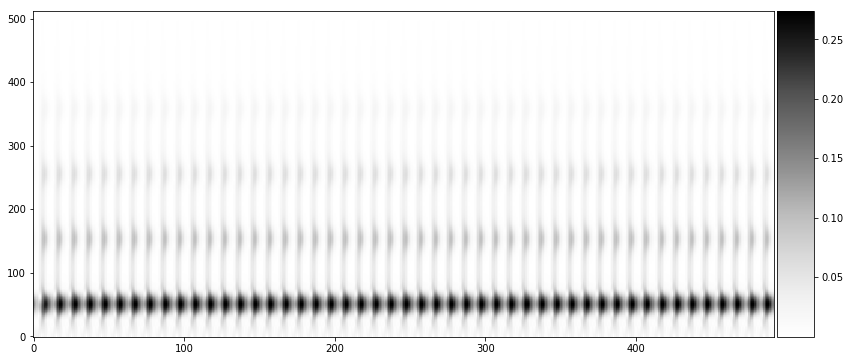

In [102]:
magspec = np.abs(np.fft.rfft(frames, n=nfft)) # frames x (nfft//2 + 1)
plot_spectrogram(magspec)

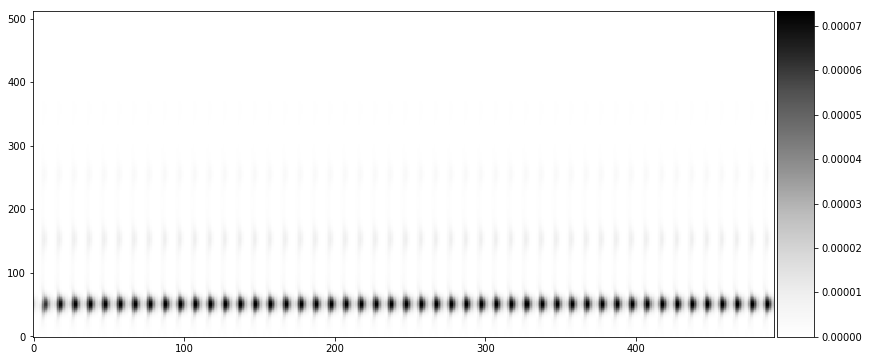

In [103]:
powspec = 1/nfft * (magspec**2)
plot_spectrogram(powspec);

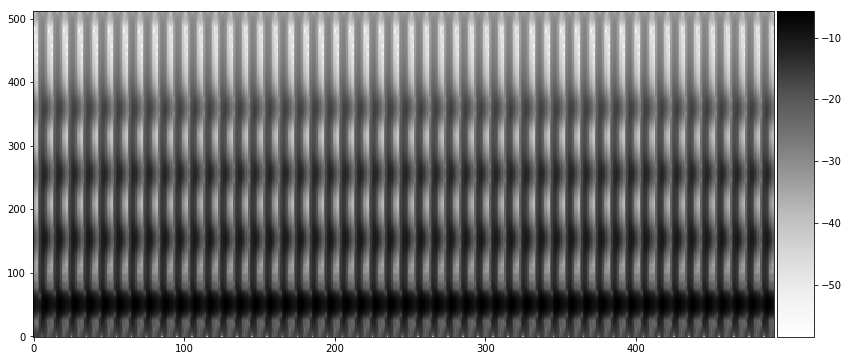

In [104]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);

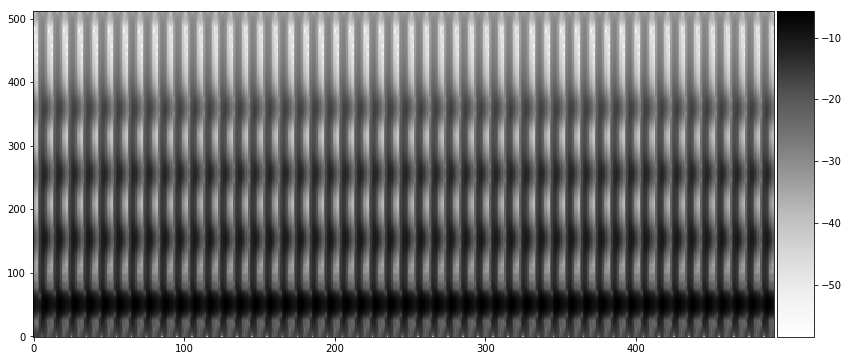

In [105]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);